In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Import and test

In [9]:
scores = pd.read_csv('./test_scores.csv')
scores.head()


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


### Set the values for the X and Y axis of the graph

In [33]:
X = scores['n_student'].values
y = scores['posttest'].values


### Reshape X axis

In [34]:
X=X.reshape(-1,1)

### Establish test and training data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

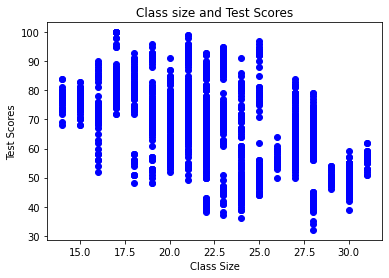

In [29]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.ylabel('Test Scores')
plt.xlabel('Class Size')
plt.title("Class size and Test Scores")
plt.show()

In [28]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 26.02 %
Test accuracy 23.53 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

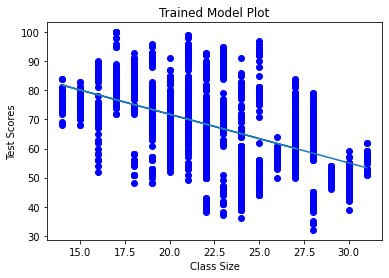

In [36]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_test,y_predict)
plt.ylabel('Test Scores')
plt.xlabel('Class Size')
plt.title("Trained Model Plot")
plt.plot


In [42]:
class_size = 10
scores_predict = lm.predict([[class_size]])[0]
print(f"With a class size of {class_size} predicted test scores would be {int(scores_predict)}")


With a class size of 10 predicted test scores would be 88


In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.2352820375617799

In [45]:
import seaborn as sns


<AxesSubplot:>

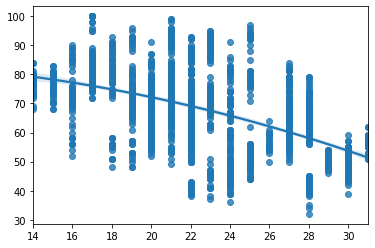

In [46]:
sns.regplot(x=x_train, y=y_train, order=2)


### Conclusions on class size and test scores:
1) There is a *slight* correlation between the two

2) I would like to see how other variables effect test scores and if they have a similar prediction accuracy and R2 scores

3) Obviously the smaller class size the better